# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_list = []
temp_list = []
lat_list = []
cloudiness_list = []
wind_speed_list = []
humidity_list = []

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# Loop through the list of cities and perform a request for data on each

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        temp_list.append(response["main"]["temp_max"])
        lat_list.append(response["coord"]["lat"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        humidity_list.append(response["main"]["humidity"])
    except:
        print(f"city not found {city}")
        pass

city not found bur gabo
city not found belushya guba
city not found taolanaro
city not found ozgon
city not found bardiyah
city not found bengkulu
city not found azimur
city not found illoqqortoormiut
city not found hihifo
city not found mocambique
city not found attawapiskat
city not found amderma
city not found one hundred mile house
city not found samusu
city not found tsihombe
city not found louisbourg
city not found vaitupu
city not found paradwip
city not found chengmai
city not found laiagam
city not found kamenskoye
city not found bossembele
city not found andevoranto
city not found sentyabrskiy
city not found saleaula
city not found olafsvik
city not found chagda
city not found nizhneyansk
city not found grand river south east
city not found barentsburg
city not found viota
city not found ruatoria
city not found marcona
city not found kismayo
city not found karauzyak
city not found balimo
city not found odweyne
city not found kashi
city not found kuche
city not found halalo
ci

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 3 columns):
City        559 non-null object
Max Temp    559 non-null float64
Lat         559 non-null float64
dtypes: float64(2), object(1)
memory usage: 13.2+ KB


In [51]:
response

{'coord': {'lon': 116.27, 'lat': -8.71},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 89.6,
  'pressure': 1012,
  'humidity': 59,
  'temp_min': 89.6,
  'temp_max': 89.6},
 'visibility': 8000,
 'wind': {'speed': 11.41, 'deg': 170},
 'clouds': {'all': 40},
 'dt': 1541124000,
 'sys': {'type': 1,
  'id': 8001,
  'message': 0.0035,
  'country': 'ID',
  'sunrise': 1541108746,
  'sunset': 1541153473},
 'id': 1630662,
 'name': 'Praya',
 'cod': 200}

In [52]:
response["wind"]["speed"]

11.41

In [53]:
response["main"]["humidity"]

59

In [54]:
print(f"We received {len(response)} responses.")

We received 12 responses.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
example = [{"City": city_list}, {"Max Temp": temp_list}, {"Lat": lat_list}]

In [56]:
example[0]["City"][0]

'Kununurra'

In [58]:
df = pd.DataFrame({"City": city_list, "Max Temp": temp_list, "Lat": lat_list, "Humidity": humidity_list, "Cloudiness": cloudiness_list, "Wind Speed": wind_speed_list})

In [61]:
df.head(10)

,City,Max Temp,Lat,Humidity,Cloudiness,Wind Speed
0,Kununurra,98.60,-15.77,35,0,5.82
1,Kaitangata,61.27,-46.28,54,64,4.85
2,Cape Canaveral,80.60,28.41,78,75,14.99
3,Busselton,63.74,-33.64,98,80,5.30
4,Port Elizabeth,66.38,39.31,78,1,8.05
5,Ushuaia,44.60,-54.81,70,75,17.22
6,Punta Arenas,41.00,-53.16,80,75,5.82
7,Vaini,75.71,15.34,73,48,6.31
8,Qaanaaq,1.91,77.48,100,0,12.24
9,Cape Town,46.40,-33.93,81,0,4.70


In [60]:
df.to_csv("cities_weather.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

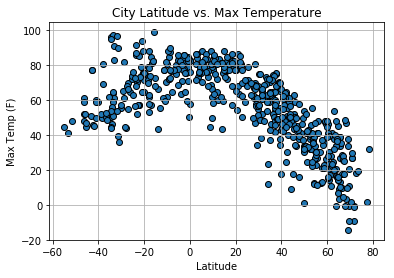

In [69]:
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=None, which='major', axis='both')
plt.scatter(x = df["Lat"], y = df["Max Temp"], edgecolor="black")

#### Latitude vs. Humidity Plot

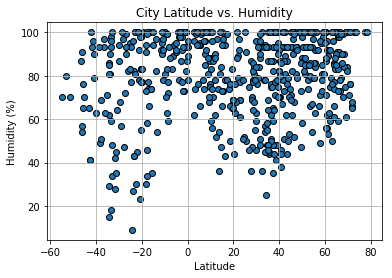

In [70]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None, which='major', axis='both')
plt.scatter(x = df["Lat"], y = df["Humidity"], edgecolor="black")

#### Latitude vs. Cloudiness Plot

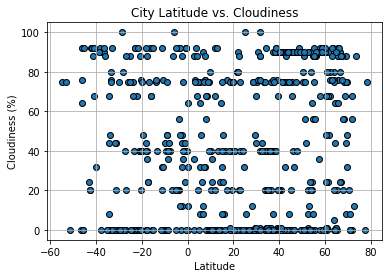

In [71]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None, which='major', axis='both')

plt.scatter(x = df["Lat"], y = df["Cloudiness"], edgecolor="black")

#### Latitude vs. Wind Speed Plot

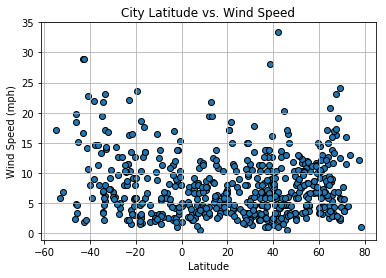

In [73]:
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None, which='major', axis='both')

plt.scatter(x = df["Lat"], y = df["Wind Speed"], edgecolor="black")